In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
early_warning_url = "../data/exp_1.csv"
early_warning = pd.read_csv(early_warning_url, sep=";")
early_warning

,Unnamed: 0,total_ips_origem,total_ips_destino,total_pacotes,5_kurt_total_ips_origem,5_skw_total_ips_destino,5_coefficient_variation_total_pacotes,has_bot
0,0,213,226,3802,NaN,NaN,NaN,0
1,1,203,223,3259,NaN,NaN,NaN,0
2,2,202,202,3966,NaN,NaN,NaN,0
3,3,196,208,3889,NaN,NaN,NaN,0
4,4,184,188,4077,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
967,967,188,192,3720,-0.657621,0.266671,0.264275,0
968,968,183,183,3567,-0.744471,0.215100,0.126705,0
969,969,209,210,3515,-0.743502,0.248631,0.124742,0
970,970,211,224,3884,-0.737227,0.212200,0.124317,0


In [3]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation

class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)
        
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

In [4]:
idioma = 'pt'
labels_traducao = []
if idioma == 'pt':
    labels_traducao = ['\n\nKurtosis do total de \n IPs de origem', 
                       '\n\nCV do total de pacotes', 
                       '\n\nSkewness do total de \n IPs de destino',
                       'Grupo 1',
                       'Grupo 2',
                       "Intervalo normal",
                       "Intervalo malicioso",
                       '\n\nTotal IPs de origem',
                       '\n\nTotal de pacotes'
                       '\n\nTotal de IPs de destino',
                      ]

[[494  38]
 [  0  10]]
              precision    recall  f1-score   support

           0     1.0000    0.9286    0.9630       532
           1     0.2083    1.0000    0.3448        10

    accuracy                         0.9299       542
   macro avg     0.6042    0.9643    0.6539       542
weighted avg     0.9854    0.9299    0.9516       542



/home/anderson/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


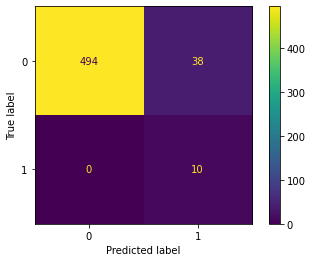

In [8]:
colunas = ['5_kurt_total_ips_origem', '5_skw_total_ips_destino', '5_coefficient_variation_total_pacotes' ]
limit = 542
init = 0
x_train = early_warning[colunas].copy()[init:limit]
y_real = early_warning['has_bot'][init:limit]
x_train = x_train.fillna(0)
clustering = KMeans(n_clusters=2, random_state=0).fit(x_train)    
y_test = clustering.labels_
print(confusion_matrix(y_real, y_test))
print(classification_report(y_real, y_test, digits=4))
ConfusionMatrixDisplay.from_predictions(y_real, y_test)

In [ ]:
colunas = ['5_kurt_total_ips_origem', '5_skw_total_ips_destino', '5_coefficient_variation_total_pacotes',
           'has_bot']
          
dataframe = early_warning[colunas][init:limit]
dataframe['y_test'] = y_test
df1= dataframe.query('has_bot == 0')                                
df2= dataframe.query('has_bot == 1')  

plt.clf()

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")
font_size = 22
ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]

ax2.set_xlabel(labels_traducao[0], fontsize=font_size)
ax2.set_ylabel(labels_traducao[1], fontsize=font_size)
ax2.set_zlabel(labels_traducao[2], fontsize=font_size)

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label=labels_traducao[5], c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label=labels_traducao[6], c='red')
fig2.legend(loc="upper center",prop={'size': font_size})
plt.show()
plt.clf()

In [ ]:
df1= dataframe.query('y_test == 0')                                
df2= dataframe.query('y_test == 1')  

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")

ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]

ax2.set_xlabel(labels_traducao[0], fontsize=font_size)
ax2.set_ylabel(labels_traducao[1], fontsize=font_size)
ax2.set_zlabel(labels_traducao[2], fontsize=font_size)

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label=labels_traducao[5], c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label=labels_traducao[6], c='red')
fig2.legend(loc="upper center",prop={'size': font_size})
plt.show()